<a href="https://colab.research.google.com/github/knschuckmann/ML_bundesliga_challange/blob/master/ML_Workshop_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Workshop

We want to welcome everybody to the annual ML Workshop in Berlin.


### Task
You require:
- Laptop
- Google Drive account
- Concentration

### Goal
To understand some minor machine learning algorithms through exercises and examine the possibilities of machine learning.


## Excercise
You will receive a dataset on a dummy logistics case. Your task will be to display the dataset but moreover to predict the main features and their weights on behalve of the price. 

⛔️  you will need to copy this Notebook to your own Google drive account

1. Click on File in Menu 
2. Click on 'Save a copy in Drive' as shown below <br/>
![copy File][2] 

3. A new Tab will be created, so you can start running this script.

[2]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Save.PNG





## Data and Library load 

### ⚠️ How Colab works

1. Colab is an online [Jupyter Notebook](https://jupyter.org/index.html), which can be accessed without any further installation
2. By Connecting to a computation power source a new instance will be created. For now we will devote ourselves, that it works and not dive into details. <br/>
![runtime][2]
3. Clicking on the play Button in each Codefield, runs the code inside this Codefield. <br/>
![run_o][3] <br/>
Only if you hover on the area of the button you will be able to see the play button<br/> ![run_1][4]
4. After you ran a cell you will see a number on the field, marking the order of the running  process  <br/>
![run_1][5]
4. # ⚠️ **Possible Errors**  
  1. It is essential to follow the order of this Notebook and **run the Codefields one after the other**. the numbers will tell you if you forgot to run a field
  2. Make sure you **copy and paste right**, without any white spaces. Especially in the feature selection part, it will be important to avoid this error 

[2]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Runtime.PNG
[3]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Run_0.PNG
[4]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Run_1.PNG
[5]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Run_2.PNG

Start importing libraries and dataset by running every Code field sequentially

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
import seaborn as sns
import ipywidgets as widgets

!pip install jupyter-dash -q
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


In [ ]:
# declare static variables (urls)
url_orig = 'https://raw.githubusercontent.com/knschuckmann/ML_bundesliga_challange/master/data/Logistic.csv'

Here you will be able to see the output of the last line from the Code field. It will display the first four lines of the dataset, so that you can take a quick look at the data. 
##### Display raw data

In [ ]:
# Load the dataset from Github link
data = pd.read_csv(url_orig, delimiter=';', decimal=',')
data.head()

,Sample,Distance,Carrier,Country pair,Lead time,Equipment,Volume yearly [m3],Customer,Domestic,Origin region,Destination region,Holiday,Speed,Loading meter,Driver exp,Inflation rate,Time window,Carrier Hub Loc,Price
0,1,663.790,Carrier1,FR-DE,22.126333,Mega,1840,Customer4,no,Origin_east,Dest_east,0,40,0,11,1,16pm,DE,918.676024
1,2,465.093,Carrier2,DE-FR,15.503100,Standard,1920,Customer1,no,Origin_north,Dest_north,1,28,7,39,4,14pm,FR,777.033264
2,3,1505.548,Carrier3,DE-GB,50.184933,Standard,480,Customer1,no,Origin_south,Dest_east,1,28,3,23,2,15pm,PL,1358.899987
3,4,1284.343,Carrier4,GB-DE,42.811433,Standard,4720,Customer1,no,Origin_east,Dest_west,1,13,9,22,2,14pm,HU,1249.050469
4,5,1157.473,Carrier5,GB-DE,38.582433,Mega,1200,Customer4,no,Origin_west,Dest_south,0,28,0,32,2,14pm,NL,1104.227008


## Understanding the dataset
It is essential to understand the dataset and get all the necessary insights about it.

What do the column headings mean? It would help if you described them one by one.

**The following table explains the column headings**
<br>
<br>

<table>
  <thead>
  <th width="200" align="left">Header</th>
  <th width="600" align="left">Description</th>
  </thead>
  <tr>
    <th align="left">Sample</th>
    <td> Integer: Unique Acneding sample number</td>
  </tr>
  <tr>
    <th align="left">Distance in [km]</th>
    <td> Float: The distance in kilometer between origin and destination</td>
  <tr>
  <tr>
    <th align="left">Carrier</th>
    <td> String: The seven different created dummy Carriers </td>
  <tr>
  <tr>
    <th align="left">Country pair</th>
    <td> String: The Pair of Country codes like FR-DE (Origin - Destination)</td>
  <tr>
  <tr>
    <th align="left">Lead time</th>
    <td> Float: Time Passed to get from origin to destination</td>
  <tr>
  <tr>
    <th align="left">Equipment</th>
    <td> String: The Carrier equipment three categories (Standard/ Mega/ Jumbo)</td>
  <tr>
  <tr>
    <th align="left">Volume yearly [m3]</th>
    <td> Integer: The Volume of different customers at different time points</td>
  <tr>
  <tr>
    <th align="left">Customer</th>
    <td> String: eight different dummy Customers</td>
  <tr>
  <tr>
    <th align="left">Domestic</th>
    <td> String: (yes/ no) Delivery only inside country Borders?</td>
  <tr>
  <tr>
    <th align="left">Origin region</th>
    <td> String: four different possible origin regions</td>
  <tr>
  <tr>
    <th align="left">Destination region</th>
    <td> String: four different possible destination regions</td>
  <tr>
  <tr>
    <th align="left">Holiday</th>
    <td> Boolean: 0 no Holiday 1 Holliday</td>
  <tr>
  <tr>
    <th align="left">Driver stress level</th>
    <td> Integer: The measured stress level of the driver during the ride x ∈ [10,40]</td>
  <tr>
  <tr>
    <th align="left">Loading meter</th>
    <td> Integer: How many meters of Loading area is preserved with goods</td>
  <tr>
  <tr>
    <th align="left">Driver exp in years</th>
    <td> Integer: The years of experience a driver has</td>
  <tr>
  <tr>
    <th align="left">Inflation rate</th>
    <td> integer: The money inflation clustered in 6 different types</td>
  <tr>
  <tr>
    <th align="left">Pick up time</th>
    <td> String: The time the carrier picked up the laggage in HH(am/pm) Format</td>
  <tr>
  <tr>
    <th align="left">Carrier Hub Loc</th>
    <td> String: Countrycode of Headquarter of the Carrier</td>
  <tr>
  <tr>
    <th align="left">Price</th>
    <td> Float: Final Price for the transport with all necessary features</td>
  <tr>
</table>

We see that the **Sample** column does not gain any value to the dataset. Same behavior is reachable through the data index. Hence we omit this column from the dataset. 

In [ ]:
data.drop('Sample', axis = 1 , inplace=True)

We made some minor analysis of the dataset. The following code shows some insights into the dataset. This is helpful in order to understand the data.

### Data description 

**Be carefull because the dataset has two types of data, numerical and categorical**

In [ ]:
data.dtypes

Distance              float64
Carrier                object
Country pair           object
Lead time             float64
Equipment              object
Volume yearly [m3]      int64
Customer               object
Domestic               object
Origin region          object
Destination region     object
Holiday                 int64
Speed                   int64
Loading meter           int64
Driver exp              int64
Inflation rate          int64
Time window            object
Carrier Hub Loc        object
Price                 float64
dtype: object

First we focus on the two different types of data present in the dataset. We retrieve only the numerical data and describe it in the next lines.

In [ ]:
#data.describe(include='all')
data_num = data.select_dtypes(include=['float64','int64'])
data_num.describe()

,Distance,Lead time,Volume yearly [m3],Holiday,Speed,Loading meter,Driver exp,Inflation rate,Price
count,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000
mean,879.223859,29.307462,4269.170848,0.508244,25.002389,6.911828,20.833453,1.481243,1015.310023
std,638.878297,21.295943,2208.394056,0.499992,8.910753,4.278165,11.327631,1.728098,365.196644
min,14.052000,0.468400,400.000000,0.000000,10.000000,0.000000,2.000000,-1.000000,456.977746
25%,467.945000,15.598167,2400.000000,0.000000,17.000000,3.000000,11.000000,0.000000,779.372920
50%,762.439000,25.414633,4320.000000,1.000000,25.000000,7.000000,21.000000,1.000000,949.334592
75%,1083.058000,36.101933,6160.000000,1.000000,33.000000,11.000000,31.000000,3.000000,1135.375773
max,4108.722000,136.957400,8000.000000,1.000000,40.000000,14.000000,40.000000,4.000000,2845.067599


We see a similar behavior to a boxplot. Main outtake here would be that the **dataset consists out of 4185 entries** and that Holiday is not really an Integer but more a Bolean. Also we can see that all numerical columns are **distributed differently**. Hence it will be hard to plot all of them in one plot. Because it will inflate.

In the following lines we describe the categorical data, which however is not coded as categorical. For now we will devote ourselfes that we deal with categories. **With categorical data we can not expect the same statistics as before.**

We retrieve the amount of entries, which is the same as ini numerical data. Furthermore we get the top frequent value as well as the frequency of that value. Also the number of unique values in that particular column. This measurement is a indicator for the possible dummy columns we will create in further calculations. 

In [ ]:
data_cat = data.select_dtypes(exclude=['float64','int64'])
data_cat.describe()

,Carrier,Country pair,Equipment,Customer,Domestic,Origin region,Destination region,Time window,Carrier Hub Loc
count,4185,4185,4185,4185,4185,4185,4185,4185,4185
unique,7,12,3,8,2,4,4,3,7
top,Carrier3,DE-DE,Standard,Customer1,no,Origin_west,Dest_west,14pm,NL
freq,598,813,3396,2856,3372,1080,1078,1448,598


#### Create Dummy-Data and Label Encoding from categorical data 

##### **Dummy-Data**

A Dummy variable is one that takes only the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome<sup>[1](https://en.wikipedia.org/wiki/Dummy_variable_(statistics))</sup>. 

We use this variable to encode our categories as can be seen in the following line. Hence we end up with many columns, one for each category. 

In [ ]:
dummy_data = pd.get_dummies(data_cat, prefix='', prefix_sep='')
dummy_data.head()

,Carrier1,Carrier2,Carrier3,Carrier4,Carrier5,Carrier6,Carrier7,CZ-DE,DE-CZ,DE-DE,DE-FR,DE-GB,DE-HU,DE-PL,FR-DE,GB-DE,NL-DE,PL-DE,TR-DE,Jumbo,Mega,Standard,Customer1,Customer2,Customer3,Customer4,Customer5,Customer6,Customer7,Customer8,no,yes,Origin_east,Origin_north,Origin_south,Origin_west,Dest_east,Dest_north,Dest_south,Dest_west,14pm,15pm,16pm,DE,FR,GB,HU,NL,PL,TR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


##### **Label Encoding**

Label Encoding refers to converting categorical labels in a data set used for machine learning purposes, into numeric form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for a structured data set in supervised learning <sup>[1](https://stackoverflow.com/tags/label-encoding/info)</sup>.

In the following line we see the same columns as before with only one column for each category group. We end up with a lightweight dataset. 

This form of preprocessing is more suitable for ML-Tasks weather the Dummy-Data preprocessing is widely used in regression problems. 

In [ ]:
cat_cast_data = data_cat.astype('category')
print('Type parsing of so called categorical data:\n\n',cat_cast_data.dtypes)
for col in cat_cast_data.columns:
  cat_cast_data[col] = cat_cast_data[col].cat.codes

print('\n\nSample of Label Encoded dataset:')
cat_cast_data.head()

Type parsing of so called categorical data:

 Carrier               category
Country pair          category
Equipment             category
Customer              category
Domestic              category
Origin region         category
Destination region    category
Time window           category
Carrier Hub Loc       category
dtype: object


Sample of Label Encoded dataset:


,Carrier,Country pair,Equipment,Customer,Domestic,Origin region,Destination region,Time window,Carrier Hub Loc
0,0,7,1,3,0,0,0,2,0
1,1,3,2,0,0,1,1,0,1
2,2,4,2,0,0,2,0,1,5
3,3,8,2,0,0,0,3,0,3
4,4,8,1,3,0,3,2,0,4


The only thing that is left to do is to combine all created datasets. With that action we will **inflate our final dataset**, because it will **contain both dummy-data and label encoding**, but **in further calculations** we will **choose either one or another** depending on the task. 

In the following code chunck you will se the final inflated dataset.

In [ ]:
# combine numerical, label encoding and dummy data 
final_data_label = data_num.merge(cat_cast_data, how='inner', right_index=True, left_index=True)
final_data = final_data_label.merge(dummy_data, how='inner', right_index=True, left_index=True)
final_data.head()

,Distance,Lead time,Volume yearly [m3],Holiday,Speed,Loading meter,Driver exp,Inflation rate,Price,Carrier,Country pair,Equipment,Customer,Domestic,Origin region,Destination region,Time window,Carrier Hub Loc,Carrier1,Carrier2,Carrier3,Carrier4,Carrier5,Carrier6,Carrier7,CZ-DE,DE-CZ,DE-DE,DE-FR,DE-GB,DE-HU,DE-PL,FR-DE,GB-DE,NL-DE,PL-DE,TR-DE,Jumbo,Mega,Standard,Customer1,Customer2,Customer3,Customer4,Customer5,Customer6,Customer7,Customer8,no,yes,Origin_east,Origin_north,Origin_south,Origin_west,Dest_east,Dest_north,Dest_south,Dest_west,14pm,15pm,16pm,DE,FR,GB,HU,NL,PL,TR
0,663.790,22.126333,1840,0,40,0,11,1,918.676024,0,7,1,3,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
1,465.093,15.503100,1920,1,28,7,39,4,777.033264,1,3,2,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,1505.548,50.184933,480,1,28,3,23,2,1358.899987,2,4,2,0,0,2,0,1,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1284.343,42.811433,4720,1,13,9,22,2,1249.050469,3,8,2,0,0,0,3,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,1157.473,38.582433,1200,0,28,0,32,2,1104.227008,4,8,1,3,0,3,2,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


All preparation is done, and we can start to display the dataset. The goal is to find some insights through the plots.

We use a very nice and straightforward library called plotly, which allows us to play around and hide some variables if required. Along with dash library we can create very dynamical plots.

You will find an interactive legend on the right side of the plots, and you can play around by clicking on the legends headings. Furthermore you will see some dropdowns. These indicate different combinations of variables we want to take a closer look on. Don't be shy and try out many combinations to get a better understanding of the dataset.

All preparation is done, and we can start to display the dataset. The goal is to find some insights through the plots.

We use a very nice and straightforward library called plotly, which allows us to play around and hide some variables if required. Along with dash library we can create very dynamical plots.

You will find an interactive legend on the right side of the plots, and you can play around by clicking on the legends headings. Furthermore you will see some dropdowns. These indicate different combinations of variables we want to take a closer look on. Don't be shy and try out many combinations to get a better understanding of the dataset.

⚠️ **Beware that if you run one Dashboard** you can access and manipulate it as long as you did not ran the other Dashboard. Once you ran an other Dashbopard you can only manipulate the other one. If you want to manipulate the first one again you need to rerun the code cell again. 

**Difference** between general plot and Dashboard:
1. **Dashboard:** <br>Dropdown buttons present</br>
2. **General plot:** <br>No Dropdowns present</br>


### Graphical interpretation 

In general we start exploring the graphical data by drawing a pairplot. This plot indicates the coorrelation between all numerical values.

**Pairplot**
1. The diagonal displays the density of each feature
2. Colors indicate different Categories
3. Everything but diagonal is a scatterplot to indicate correlation

We furthermore created a hue for the category "Customer". Therefore you will see different colors indicating different Customers. As for the start we used a small subset of the final data, that we chose carefully, so you get the idea of the pairplot.

**Main Outcomes**
1. Distance, Price and Lead Time are highly correlated. 
  1. ⚠️ **This does not mean that these columns are also causaly dependent** 
    1. To check the causality we would need to run hypothesisi testing. 
    2. We will devote for now, that we will not continue in that direction and stick to simple correlation without any causality. Hence we will not ommit these columns.
2. The later Customers 5-7 are not as widely distributet as the former ones
3. Density, Lead Time, and Price are Shifted
  1. Using the logarithm on these columns could shift them back
4. Another positive corelation is between Distance, Lead Time, Price and Country Pair



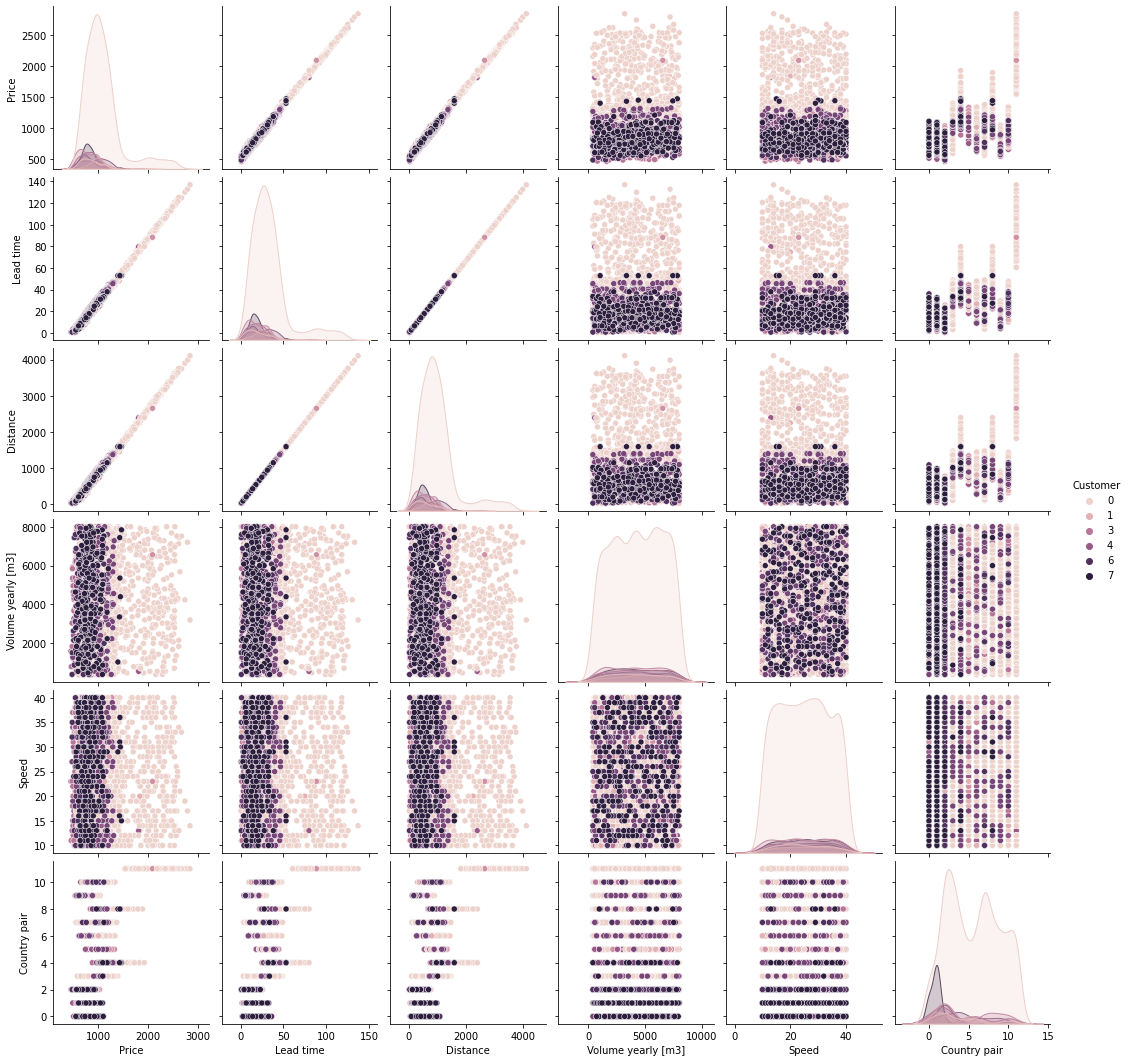

In [ ]:
careful_chose_columns = ['Price', 'Lead time', 'Distance', 'Volume yearly [m3]', 'Speed', 'Country pair', 'Customer']
#final_data[careful_chose_columns].head()
sns.pairplot(final_data[careful_chose_columns], hue='Customer')

The Pairplot above is good for small datasets and as a first insight. We too choose a correlation matrix for a better represantation. Especially a Heatmap can help determine correlations quickly. In the following heatmap we took the final data with label encoding and put the dummy data aside.

In general we say that corelation indicate a dependency of two variables. 

**Main Outcomes**
1. There is more correlation present as assumed
  1. Equipment, Customer, and Domestic are too correlated with Lead Time, Distance and Price
  2. Some Columns are negatively correlated
2. Carrier Hub Loc is positve correlated to Carrier

In [ ]:
fig = go.Figure()
corr = final_data_label.corr()
fig.add_trace(go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values))
fig.update_layout(
    title='Heatmap of correlations',
    xaxis_title='Data Columns'
)
fig.show()

The Heatmap and the pairplot above make a pretty good impression. But more than the correlation between each column we can not derive for now. Some of the correlation outcomes could be described in a logical manner. If one would think about it, "Lead time" and "Distance" mark such a logical correlation. 

To make some predictions about the relationship between the columns or as you might call them features we need some more and detailed graphical analysis. 

#### Dashboards 


##### Daschboard Violin/Box
The folowing Dashboard is very dynamical. 

You can explore the dataset by yourself.

We also provide a manual on how you can explore the data and how you can interpret the graphical outcomes.

A small **description of** all **plots** in this Dashboard: 
1. All plots are devided into customers
2. You can either choose to plot the "Price" or the "Price/Km" on y-Axis
3. You can either choose to plot the breakdown of "Equipment" or "Carrier" on x-Axis

Furthermore you will find a dropdown indicating what kind of plots you want to display. Possibilities are a Violin or a Boxplot. 

**Boxplot**
+ In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles... they allow one to visually estimate various estimators, notably the interquartile range, midhinge, range, mid-range, and trimean... A boxplot is a standardized way of displaying the dataset based on a five-number summary:<sup>[1](https://en.wikipedia.org/wiki/Box_plot)</sup>
  + the minimum
  + the maximum
  + the sample median
  +  first and third quartiles.

**Violinplot**
+ A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side.<sup>[2](https://en.wikipedia.org/wiki/Violin_plot)</sup>


In [ ]:
try:
  app._terminate_server_for_port("localhost", 8000)
except:
  pass
  
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Dynamic Categorical Plots"),
    html.P("Plot Category:"),
    dcc.Dropdown(
        id='plot_cat', 
        value='Box', 
        options=[{'value': x, 'label': x} 
                 for x in ['Box','Violin']],
        clearable=False),
    html.Div([
      html.P("Category:"),
      dcc.Dropdown(
          id='x_Axis', 
          value='Carrier', 
          options=[{'value': x, 'label': x} 
                   for x in ['Equipment','Carrier']],
          clearable=False),
    ],style=dict(width='45%', display='inline-block')
    ),

    html.Div([],style=dict(width='10%', display='inline-block')
    ),
    
    html.Div([
      html.P("Values:"),
      dcc.Dropdown(
          id='y_Axis', 
          value='Price/Km', 
          options=[{'value': x, 'label': x} 
                    for x in ['Price/Km','Price', 'Distance']],
          clearable=False),
    ],style=dict(width='45%', display='inline-block')
    ),
    dcc.Graph(id="bar-chart")
])
@app.callback(
    Output(component_id='bar-chart', component_property='figure'),
    [Input(component_id='plot_cat', component_property='value'),
     Input(component_id='x_Axis', component_property='value'),
     Input(component_id='y_Axis', component_property='value'),]
)
def update_output_div(plot_cat, x_Axis, y_Axis):
  fig = go.Figure()
  for customer in data['Customer'].unique():
    temp = data[data['Customer'].str.contains(customer)]
    if plot_cat == 'Violin':
      if y_Axis== 'Price/Km':
        fig.add_trace(go.Violin(x=temp[x_Axis], y=temp['Price']/temp['Distance'], name= customer))
      elif y_Axis == 'Price':
        fig.add_trace(go.Violin(x=temp[x_Axis], y=temp['Price'], name= customer))
      elif y_Axis == 'Distance':
        fig.add_trace(go.Violin(x=temp[x_Axis], y=temp['Distance'], name= customer))
    elif plot_cat == 'Box':
      if y_Axis== 'Price/Km':
        fig.add_trace(go.Box(name = customer, x = temp[x_Axis], y = temp['Price']/temp['Distance']))
      elif y_Axis == 'Price':
        fig.add_trace(go.Box(name = customer, x = temp[x_Axis], y = temp['Price']))
      elif y_Axis == 'Distance':
        fig.add_trace(go.Box(name = customer, x = temp[x_Axis], y = temp['Distance']))
  fig.update_layout(
    title= y_Axis + ' ' + plot_cat +'plot for all Customers and ' + x_Axis,
    xaxis_title=x_Axis,
    yaxis_title=y_Axis,
    boxmode='group',
    violinmode='group'
  )
  return fig

if __name__ == '__main__':
  app.run_server(mode='inline', port=800)

<IPython.core.display.Javascript object>

**Main Outcomes**
+ From past data description we know that "**Customer1**" is most present in the dataset. In the plot above (Box, Carrier or Equipment, Price) we see that this Customer **has many outliers**. 
+ However, ploting the Price/Km we obtain that the assumed "Customer1" is not realy a big outlier. The past outliers for Price could be described with the long distances the customer is driving and the previous high correlation.

**Dealing with Outliers**
+ When dealing with Outliers, the main goal is to understand the dataset and especially the outliers
+ There are **two common ways** to deal with outliers
  1. **Remove:** 
    + cause is not natural and descriptive e.g. typo when measurements where digitized 
  2. **Leave:**
    + cause natural and hard to say how the outliers where produced. The values are important for other dependent columns

⚠️ Due to the behavior of the outliers column and the dependencies to especially "Distance" we decided to **leave the data as it is**.

##### Dashboard Distance
In the following scatterplot we see a plot for the "Distance" against "Price/Km" divided into different categories. The differnt colors on the scatter mark the categories. 


In [ ]:
app._terminate_server_for_port("localhost", 8000)
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1('Distance plot for different categories'),
    html.Div([
      html.P("Category:"),
      dcc.Dropdown(
          id='x_Axis', 
          value='Carrier', 
          options=[{'value': x, 'label': x} 
                   for x in ['Equipment','Carrier', 'Country pair', 'Customer',	'Domestic', 	'Origin region', 	'Destination region', 'Time window', 'Carrier Hub Loc']],
          clearable=False),
    ],style=dict(width='15%', display='inline-block')
    ),
    dcc.Graph(id="scatterplot")
])
@app.callback(
    Output(component_id='scatterplot', component_property='figure'),
    [Input(component_id='x_Axis', component_property='value')]
)
def update_output_div(x_Axis):
  fig = go.Figure()
  for equip in data[x_Axis].unique():
    temp = data[data[x_Axis].str.contains(equip)]
    fig.add_trace(go.Scatter(x= temp['Distance'], y=temp['Price']/temp['Distance'], name=equip ,mode='markers') )
  fig.update_layout(
    title= 'Price per Km devided in ' + x_Axis,
    xaxis_title='Distance',
    yaxis_title='Price/Km',
    boxmode='group',
    violinmode='group'
  )
  return fig

if __name__ == '__main__':
  app.run_server(mode='inline', port= 8000)

<IPython.core.display.Javascript object>

**Main Outcomes**
+ We can prove our assumptions of Price and Distance.
+ For different Categories we see:
  + Carrier
    1. We see that the far one goes the less he pays per Km
    2. As Boxplot showed Carriers tend to travel between arround 100 and 1500 km  
  + Equipment
    1. Jumbo usually shorter trips
    2. Mega is as stated in the range between arround 100 and 1500 
    3. Standrad has the widest range -> Hence traveling the longest distances with standard Equipment and paying less.
  + Customer
    1. Customer1 is traveling the longest distances and therefore a lot of standard Equipment
    2. All other Customers are similar in the distances
  + Destination
    1. Destinations are pretty equal distributed -> all Carriers come from all destinations
  + Time
    1. Outliers in 14pm and 15pm show that these pickup times had longer distances than 16pm pickup time.

##### Dashboard Bar

In the following Barplots you will see the distribution of the categories, if you put both categories the same value. Usually we see these plots in the pairplot diagonal, becasue we decided to plot the density we did not deal with these plots yet. 

If you decide to put two different categories, you will experience the distribution of both categories to each other. This plot should be helpfull to understand the categories in the scatterplot above and take closer looks on these categories and their distributions.

In [ ]:
app._terminate_server_for_port("localhost", 8000)
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Dynamic Categorical Bar Plots"),
    html.Div([
      html.P("Split Category:"),
      dcc.Dropdown(
          id='x_Axis', 
          value='Carrier', 
          options=[{'value': x, 'label': x} 
                   for x in data_cat.columns],
          clearable=False
      ),
    ],style=dict(width='30%', display='inline-block')),
    html.Div([],style=dict(width='10%', display='inline-block')),
    html.Div([
      html.P("Dependent Category:"),
      dcc.Dropdown(
          id='counts', 
          value='Equipment', 
          options=[{'value': x, 'label': x} 
                   for x in data_cat.columns],
          clearable=False
      ),
    ],style=dict(width='30%', display='inline-block')),
    dcc.Graph(id="bar-chart")
])
@app.callback(
    Output(component_id='bar-chart', component_property='figure'),
    [Input(component_id='x_Axis', component_property='value'),
    Input(component_id='counts', component_property='value')]
)
def update_output_div(x_Axis, counts):
  fig = go.Figure()
  temp = data_cat.groupby(by=[x_Axis,counts]).count()
  data_temp = temp[temp.columns[0]].unstack()
  for col in data_temp.columns:
    fig.add_trace(go.Bar(name=col, x = data_temp.index, y = data_temp[col]))
  #fig.layout.update(barmode='group')
  fig.update_layout(
    xaxis_title=x_Axis,
    yaxis_title=counts + ' counts',
    boxmode='group'
  )
  return fig

if __name__ == '__main__':
    app.run_server(mode='inline', port=8000)

<IPython.core.display.Javascript object>

**Main Outcomes**
+ Split Category:
  + Carriers 
    1. Equally distributed and the Equipments are equally distributed too
    2. All Carriers usually more deliveries inside germany
    3. As expected "Customer1" is most purchaser -> odd that Customer1 uses all carriers equaly 
    4. All Carriers are from different locations -> odd that most deliveries inside of germany even though different locations
  +  Country pair
    1. Jumbo deliveries only to and from CZ
    2. Customers are very widely fenced where to and from where they deliver
      + e.g. Customer8 does not drive to many locations, mainly to and from CZ 
      + Customer1 drives to all locations
  + Customer
    1. Customer8 all three types of equipment and the only one delivering Jumbo
    2. Standard delivery usually from Customer1
    3. Mega ususally Customers 4 and 5

For more outcomes we advise you to explore the plots on your own. 

Finally we can say, that in the plot above we see that some categorical features are not equaly distributed. We too saw that in the pairplot with the densities. Some where higher and some lower. 

Because the dataset is not distributed well we could obtain some missleading results. Therefore we try to stratify our train and test split, so we have equal distribution in both splits. 

This method is helpfull when dealing with important categorcal data for the outcome. The general approach would be a random train and test split. 

**reminder**
+ Train and Test split is important for unbiased data. Testing the goodness of the model on the same data as trained prodduces bias.

We could extract the following categorical columns as not well distributed
1. "Country pair"
2. "Equipment"
3. "Customer"
4. "Domestic"

Because the programm does not allow to stratify to multiple columns we have to decide which column would have the biggest impact on our outcome.



## Machine learning Algorithms

There are many algorithms out there, but mostly you will be working with a hand full of them. 

1. First, you need to make sure what to predict. In order to do so, one needs a good question or a statement to start with. **Predict the price for a certain destination!**

2. Secondly, you will need to decide if you want to predict a category or a numerical number. This can be done by looking at the variable you want to predict. In our case, it is a  regression problem. Therefore we will concentrate on regression algorithms.

3. We need to separate our data into a training and a test set.
  - The training set will be used to train the model 
  - The test set will be used to validate the model and get the goodness of our trained model

**So let's start predicting for real now...**

### Data cleansing
Spliting the data into train and test.

In [ ]:
X = final_data.loc[:, final_data.columns != 'Price']
y = final_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=X[['Country pair']])

print('Shapes \nX_train: {}\nX_test:  {}'.format(X_train.shape,X_test.shape))
print('\n\nX_test head print:\n')
X_test.head()

Shapes 
X_train: (2511, 67)
X_test:  (1674, 67)


X_test head print:



,Distance,Lead time,Volume yearly [m3],Holiday,Speed,Loading meter,Driver exp,Inflation rate,Carrier,Country pair,Equipment,Customer,Domestic,Origin region,Destination region,Time window,Carrier Hub Loc,Carrier1,Carrier2,Carrier3,Carrier4,Carrier5,Carrier6,Carrier7,CZ-DE,DE-CZ,DE-DE,DE-FR,DE-GB,DE-HU,DE-PL,FR-DE,GB-DE,NL-DE,PL-DE,TR-DE,Jumbo,Mega,Standard,Customer1,Customer2,Customer3,Customer4,Customer5,Customer6,Customer7,Customer8,no,yes,Origin_east,Origin_north,Origin_south,Origin_west,Dest_east,Dest_north,Dest_south,Dest_west,14pm,15pm,16pm,DE,FR,GB,HU,NL,PL,TR
643,482.27300,16.075767,6480,1,23,14,4,4,6,2,1,3,1,2,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4052,978.50600,32.616867,7520,1,24,3,19,3,6,0,1,7,0,1,3,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
716,1101.93100,36.731033,4320,1,39,9,29,0,2,4,2,0,0,1,0,2,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1082,283.25300,9.441767,3440,1,21,6,5,-1,4,9,1,3,0,2,0,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
808,2212.90147,73.763382,6720,1,33,14,27,3,3,11,2,0,0,0,3,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


Sometimes you have data that can not be compared to each other because of the scale. So you could scale everything into a normal distribution with the scale function from the library Sklearn. This normalizes any dataset to the standard deviation $N(\mu,\sigma^2)$ with mean equal to zero and variance equal to one.

Again because of the bias we should fit our normalization only to trainig data and than apply it to test data. 

To make the whole code short we declare pipelines that contain many concatenated actions and we do not have to do all these action one by one. Instead we call the pipeline and hand over the data. 

In [ ]:
pipes = {'linear': Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)), ('linear', LinearRegression())]), 
         'knn':Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)), ('knn', KNeighborsRegressor(n_neighbors=2))]),
         'rf':Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)), ('rf', RandomForestRegressor(max_depth=2, random_state=0))])}

**Goal:**</br>
The goal is to find the best model by choosing different features from the following displayed once  
1. Choose a maximum of **29 features** for further calculation and prediction
  * You will be able to repeat this step over and over until you find the best result 

⚠️ Beware of the **different types of features**, some fit regression, some other ML algorithms. You can try both alone and together out and see based on your results which features are the best and especially which fit the best for which model.

### **Loop Start**

#### Select Features
⚠️ Click on the feature checkboxes you want your model to train with below. </br>
Try to **choose wisely**.</br>

⛔️ After you get the results, you will be able to start over from here with different features to improve your model. Just choose different features and run the cells again. **If you want to uncheck all boxes run the following codecell again.**


Here we begin to predict the outcome of any given datapoint. Therefore we need to use some Machine learning algorithms. The most common once we use in the upcoming prediction are:


1.   **[Linear Regression][lin]**
2.   **[K Neirest Neighbors][knn]**
3.   **[Random Forrest][RF]**

Those are state of the art for regression problems. Especially the Linear Regression is the first one to try out.

[lin]: https://en.wikipedia.org/wiki/Linear_regression#:~:text=In%20statistics%2C%20linear%20regression%20is,as%20dependent%20and%20independent%20variables).
[knn]: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
[RF]: https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76


In [ ]:
X_train.columns

Index(['Distance', 'Lead time', 'Volume yearly [m3]', 'Holiday', 'Speed',
       'Loading meter', 'Driver exp', 'Inflation rate', 'Carrier',
       'Country pair', 'Equipment', 'Customer', 'Domestic', 'Origin region',
       'Destination region', 'Time window', 'Carrier Hub Loc', 'Carrier1',
       'Carrier2', 'Carrier3', 'Carrier4', 'Carrier5', 'Carrier6', 'Carrier7',
       'CZ-DE', 'DE-CZ', 'DE-DE', 'DE-FR', 'DE-GB', 'DE-HU', 'DE-PL', 'FR-DE',
       'GB-DE', 'NL-DE', 'PL-DE', 'TR-DE', 'Jumbo', 'Mega', 'Standard',
       'Customer1', 'Customer2', 'Customer3', 'Customer4', 'Customer5',
       'Customer6', 'Customer7', 'Customer8', 'no', 'yes', 'Origin_east',
       'Origin_north', 'Origin_south', 'Origin_west', 'Dest_east',
       'Dest_north', 'Dest_south', 'Dest_west', '14pm', '15pm', '16pm', 'DE',
       'FR', 'GB', 'HU', 'NL', 'PL', 'TR'],
      dtype='object')

In [ ]:
column_list = ['Distance', 'Lead time', 'Volume yearly [m3]', 'Holiday', 'Speed', 'Loading meter', 'Driver exp', 'Inflation rate', 'Equipment', 'Origin region', 'Carrier Hub Loc', 
               'Carrier1', 'Carrier2', 'Carrier3', 'Carrier4', 'Carrier5', 'Carrier6', 'Carrier7', 'CZ-DE', 'DE-CZ', 'DE-DE', 'DE-FR', 'DE-GB', 'DE-HU', 'DE-PL', 'FR-DE', 'GB-DE', 
               'NL-DE', 'PL-DE', 'TR-DE', 'Customer1', 'Customer2', 'Customer3', 'Customer4', 'Customer5', 'Customer6', 'Customer7', 'Customer8', 'no', 'yes', 'Dest_east', 'Dest_north', 'Dest_south',
               'Dest_west', '14pm', '15pm', '16pm']
checkboxes = [widgets.Checkbox(value=False, description=label) for label in column_list]
output = widgets.GridBox(children=checkboxes, layout=widgets.Layout(grid_template_columns="repeat(4, 200px)"))
display(output)

GridBox(children=(Checkbox(value=False, description='Distance'), Checkbox(value=False, description='Lead time'…

#### Display Selection

With the following codecell you will **display all the checked features**. 

⚠️ When reruning the Loop you do not need to run the cell above over and over, just check and uncheck the boxes you want and start running from the following codecell.


In [ ]:
selected_data = []
for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        selected_data = selected_data + [checkboxes[i].description]

selected = [widgets.Label(str(label)) for label in selected_data]
output = widgets.GridBox(children=selected, layout=widgets.Layout(grid_template_columns="repeat(4, 200px)"))
print('Display selected Data:\n')
display(output)


Display selected Data:



GridBox(layout=Layout(grid_template_columns='repeat(4, 200px)'))

#### Create results

In the following codelines we will create the final result table containing all introduced predictions in different measurements.

For each and every Algorithm we will have the **predicted part, the calculated residuals and the percentage of the residuals as well as the final classification** for better and understandable measurement.  

Formula we used to calculate residuals: </br>
$|\text{predicted} - \text{original}|$  

Formula we used to calculate percentage of residuals: </br>
$\frac{|\text{predicted} - \text{original}|}{\text{original}}$  

In [ ]:
result_df = pd.DataFrame(y_test.reset_index(drop=True))
for pipe in pipes:
  pipes[pipe].fit(X_train[selected_data], y_train)
  result_df['pred ' + pipe + ' Price'] = list(pipes[pipe].predict(X_test[selected_data]))
  result_df['resid ' + pipe] = np.abs(result_df['Price'] - result_df['pred ' + pipe + ' Price'])
  result_df['%resid ' + pipe] =result_df['resid ' + pipe]/result_df['Price']
  result_df['class ' + pipe] = np.where(result_df['%resid ' + pipe]<0.02, 'good', 'bad') 

result_df.head()

ValueError: ignored

#### Compare results

In [ ]:
result_subset = result_df[result_df.columns[result_df.columns.str.contains('Price')]]
resid_subset = result_df[['resid linear', 'resid knn', 'resid rf']]
fig = go.Figure()
for col, res_col in zip(result_subset, resid_subset):
  fig.add_trace(go.Scatter(y = result_subset[col], name=col, mode='lines'))
  fig.add_trace(go.Scatter(y = resid_subset[res_col], name=res_col, mode='lines'))

fig.update_layout(
    title='Residual and predictionplot',
    yaxis_title = 'Price and Price difference'
  )
fig.show()


The Table and the Plot above are already good indicators for the goodness, but the actual scores, calculated by a simple rule of thumb where you divide right predicted by the actual number of sample, is a better indicator for the goodness of the algorithm. We will call this measurement Accuracy.  

**For the best Accuracy result, try to improve only one of the following 3 values** </br>
⚠️ Following, the prediction results. The R<sup>2</sup> value can be disregarded:

In [ ]:
for pipe in pipes:
  print(pipe + ' Acc: {0:.2f}%    R2-Value: {1:.2f}'.format( (result_df['%resid ' + pipe][result_df['%resid ' + pipe]<0.02].count()/result_df.shape[0])*100, 
                                                            pipes[pipe].score(X_test[selected_data], y_test)
                                                            )
  )

### **Loop End**

If you found the best result, **make sure that it is reproducible** by running the loop one last time and getting the same results as before. </br>

Now download the .ipynb file and send it to us, by clicking on Download .ipynb</br>
![download][1] 


[1]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Download.PNG